## Partie : Prediction basée sur les pixels

Ce notebook présente l'apprentissage d'un classifieur de fruits multiclasse avec un classifieur naif bayesin s'appuyant sur la loi de bernoulli.
Ce qui est important avec ce choix de modélisation, c'est qu'il faut que nos données soit binaire, c'est à dire 0/1, car c'est le critère de l'expérience de Bernouilli. Donc, dans cette partie nous allons étudier les performance d'un pre processing sur les images en transformant nos images du format RVB vers une binarisation noir/blanc.

## Importation des libs

In [1]:
import numpy as np
from tqdm import tqdm
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
from pylab import *
import random
from sklearn.utils import shuffle

## Importation des données

Nous avons extrait ces données depuis un dataset disponible sur kaggle à l'adresse suivante : https://www.kaggle.com/datasets/moltean/fruits

In [7]:
fruits = ["Banane","Mais","Fraise","Framboise","Clementine","Poire",
          "Nectarine","Orange","Lychee","Kiwi","Mirtille","Cerise",
          "Abricot","Citron","Melon","Tangelo","Plum","Peche","Kaki","Mangue"]

In [8]:
format_fichier = [".jpg"]

def lire_images(cheminRacine, array, y, index):   
    print(f"chargement {fruits[index]}")
    for lists in tqdm(os.listdir(cheminRacine)): 
        chemin = os.path.join(cheminRacine, lists) 
        filename, extension = os.path.splitext(chemin) 
        if extension in format_fichier:   
            array.append(mpimg.imread(chemin))
            y.append(index)
        if os.path.isdir(chemin): 
            lire_images(chemin, array, y, index)
images = []
classes = []

#remplissage de la liste d'images + classes
lire_images("../Training/Banana", images, classes, 0)
lire_images("../Training/Corn", images, classes, 1)
lire_images("../Training/Strawberry", images, classes, 2)
lire_images("../Training/Raspberry", images, classes, 3)
lire_images("../Training/Clementine", images, classes, 4)
lire_images("../Training/Pear Williams", images, classes, 5)
lire_images("../Training/Nectarine", images, classes, 6)
lire_images("../Training/Orange", images, classes, 7)
lire_images("../Training/Lychee", images, classes, 8)
lire_images("../Training/Kiwi", images, classes, 9)
lire_images("../Training/Blueberry", images, classes, 10)
lire_images("../Training/Cherry 1", images, classes, 11)
lire_images("../Training/Apricot", images, classes, 12)
lire_images("../Training/Lemon", images, classes, 13)
lire_images("../Training/Watermelon", images, classes, 14)
lire_images("../Training/Tangelo", images, classes, 15)
lire_images("../Training/Plum", images, classes, 16)
lire_images("../Training/Peach", images, classes, 17)
lire_images("../Training/Kaki", images, classes, 18)
lire_images("../Training/Mango", images, classes, 19)




K = len(fruits)

images,classes = shuffle(images, classes, random_state=10) 

chargement Banane


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:00<00:00, 2537.51it/s]


chargement Mais


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 450/450 [00:00<00:00, 2615.38it/s]


chargement Fraise


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:00<00:00, 2701.03it/s]


chargement Framboise


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:00<00:00, 2732.64it/s]


chargement Clementine


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:00<00:00, 2713.35it/s]


chargement Poire


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:00<00:00, 2685.87it/s]


chargement Nectarine


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:00<00:00, 2720.36it/s]


chargement Orange


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 479/479 [00:00<00:00, 2317.66it/s]


chargement Lychee


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:03<00:00, 149.23it/s]


chargement Kiwi


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 466/466 [00:00<00:00, 583.62it/s]


chargement Mirtille


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 462/462 [00:03<00:00, 136.46it/s]


chargement Cerise


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:02<00:00, 240.74it/s]


chargement Abricot


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:01<00:00, 291.60it/s]


chargement Citron


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:01<00:00, 423.80it/s]


chargement Melon


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 475/475 [00:01<00:00, 410.43it/s]


chargement Tangelo


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:04<00:00, 112.59it/s]


chargement Plum


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 447/447 [00:02<00:00, 166.59it/s]


chargement Peche


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:02<00:00, 220.41it/s]


chargement Kaki


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:01<00:00, 326.18it/s]


chargement Mangue


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:03<00:00, 130.23it/s]


In [16]:
images = np.asarray(images, dtype=int)
classes = np.asarray(classes, dtype=int)

print(images.shape)
print(classes.shape)
print(f"Nous avons au total {len(images)} images dans notre dataset en 50x50 avec 3 couleurs") 

(9651, 50, 50, 3)
(9651,)
Nous avons au total 9651 images dans notre dataset


Voici une representation d'images de notre dataset :


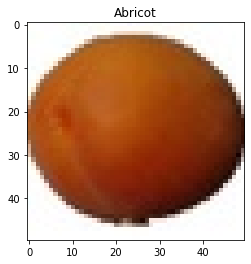

In [48]:
print("Voici une representation d'images de notre dataset :")
index_demo = 5
img_demo = images[index_demo]
plt.figure()
plt.imshow(img_demo)
plt.title(fruits[classes[index_demo]])
plt.show()

## Fonctions de préparation des données

Voici quelques fonctions utiles qui nous permettrons de transformer nos images RVB vers le format Noir/Blanc

In [27]:
def transformer_en_gris(img_orig):
    im = np.zeros((img_orig.shape[0],img_orig.shape[1])) # On fait une copie de l'original
    for i in range(img_orig.shape[0]):
        for j in range(img_orig.shape[1]):
            r, v, b = img_orig[i, j]
            moyenne = np.mean(img_orig[i, j])
            im[i, j] = int(moyenne)
    return im 

def transformation(arr):
    l = np.zeros((np.shape(arr)[0],np.shape(arr)[1],np.shape(arr)[2]))
    for i in tqdm(range(np.shape(arr)[0])):
        l[i] = transformer_en_gris(arr[i])
    return l

def applatir(images):
    taille_applatie = np.shape(images)[1]*np.shape(images)[2]
    images_applaties = np.zeros((np.shape(images)[0],taille_applatie))
    for i in tqdm(range(len(images))):
        images_applaties[i]= images[i].ravel()
    return images_applaties

## Fonctions de preprocessing

prends 5min ...

In [28]:
images_grises = transformation(images)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:47<00:00, 33.54it/s]


In [30]:
print(images_grises.shape)

(9651, 50, 50)


Voici une representation d'images de notre dataset en N/B :


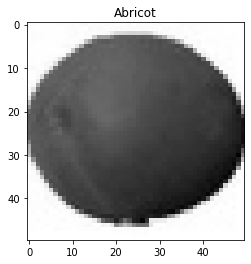

In [49]:
print("Voici une representation d'images de notre dataset en N/B :")
index_demo = 5
img_demo = images_grises[index_demo]
plt.figure()
plt.imshow(img_demo,  cmap='gray')
plt.title(fruits[classes[index_demo]])
plt.show()

In [29]:
X = applatir(images_grises)

In [33]:
print(X.shape)

(9651, 2500)


In [35]:
# On melange le dataset
y = classes
X , y  = shuffle(X, y, random_state=10)

In [36]:
## on binarise X, de sorte que il vaut soit 0 soit 1,
## comme les valeurs prises par une loi de Bernoulli
X /= X.max()
mask = (X > 0.5)
X[mask] = 1
X[np.invert(mask)] = 0

Voici une representation d'images de notre dataset en Binaire :


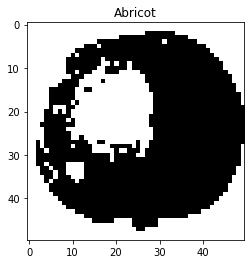

In [52]:
print("Voici une representation d'images de notre dataset en Binaire :")
index_demo = 5
img_demo = np.array(X[index_demo]).reshape((50,50))
plt.figure()
plt.imshow(img_demo,  cmap='gray')
plt.title(fruits[classes[index_demo]])
plt.show()

In [37]:
Ntot   =  X.shape[0]
Ntrain = int(0.8 * Ntot)

X_train = X[:Ntrain]
X_test  = X[Ntrain:]
y_train = y[:Ntrain]
y_test  = y[Ntrain:]

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7720, 2500)
(1931, 2500)
(7720,)
(1931,)


## Modèle du bayesien naïf : representation sous forme de loi de Bernoulli

Pour contruire notre fonction de classification, on va représenter nos données sous forme binaire afin de pouvoir effectuer une expérience de Bernoulli dessus. C'est à dire que chaque dimension d'un exemple doit valoir soit 0 soit 1 afin qu'on puisse calculer ce type de probabilité :
$ P(X_d = x_d | \theta , y) = p_i^{x_d}*(1 - p_d)^{(1 - x_d)}$ ou $d$ représente une dimension, $p_d \in[0,1] $ la probabilité que cette dimension prenne la valeur $1$ , $y \in \{classe\}$ la classe, et $x_d \in \{0,1\}$ la valeur possible.

Pour construire notre classifieur, nous cherchons à choisir la probabilité maximum d'une classe par rapport a l'image et a des paramètres que l'on va apprendre. on écrit cela ainsi :
<p style="text-align: center;">
    $ y_{pred} = argmax_y P(y | x_i , \theta)$
</p>
Ou $i$ représente l'image $i$.

Notre fonction de prediction s'écrira donc : 
<p style="text-align: center;">
    $f_{\theta}(x_i) = argmax_y P(y | x_i , \theta)$
</p>
Pour calculer la quantité $P(y | x_i , \theta)$, nous allons passer par la loi de Bayes ($P(A,B) = P(A|B)P(B) = P(B|A)P(A) <=> P(A|B) = P(B|A)P(A)/P(B)$)

Ce qui nous donne : $P(y | x_i , \theta) = \frac{P(x_i | y , \theta) P(y)}{P(x_i)}$. De plus, on remarque que $P(x_i)$ est constant pour chaque classe, nous pouvons donc l'enlever de l'équation car le résultat sera proportionnel. \
On obtient : 
<p style="text-align: center;">
    $P(y | x_i , \theta) = P(x_i | y , \theta) P(y) $
</p>
La prior $P(y)$ est la probabilté qu'un exemple soit de la classe $y$ donc nous pouvons calculer cette quantité trivialement en comptant le nombre 
d'exemple de la classe puis en divisant par le nombre total d'exemples tel que.
<p style="text-align: center;">
    $P(y_j) = \frac{1}{N}\sum_{i}^{N} classe(x_i,y_j)$
</p>
Ou $N$ représente le nombre d'exemple du dataset et $classe(x_i)$ est une fonction indicatrice si $x_i$ est bien de la classe $y_i$

La vraissemblance des données par rapport aux classes et aux paramètres ce calcul de la manière suivante en faisant une hypothèse d'indépendance entre les dimensions sinon le calcul n'aura pas été faisable: 
<p style="text-align: center;">
    $ P(x_i | y_k , \theta) = \prod_{d}^{D} P(x_{i,d} | \theta)$
</p>
<p style="text-align: center;">
    $ = \prod_{d}^{D} p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})}$
</p>
Nous voyons d'après cette équations que nous avons à trouver les valeurs de 50x50x20 = 50 000 paramètres ($p_{k,d} \in \theta$).
50x50 : nombre de dimensions et 20 : nombre de classe

En résumant les équations ci-dessus la fonction finale de prédiction s'écrit : 
<p style="text-align: center;">
    $f_{\theta}(x_i) = argmax_y  \prod_{d}^{D} p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})} * \frac{1}{N}\sum_{i}^{N} classe(x_i,y_j) $
</p>

Nous avons à présent besoin de trouver les paramètres $p_{k,d}$ nécessaire à notre fonction de prédiction. Pour cela nous allons les estimés par la méthode du maximum de vraisemblance. Comme nous l'avons dit plutot la vraisemblance se définit par : $ L(x_i,\theta,y_k) = P(x_i | y_k , \theta) = \prod_{d}^{D} P(x_{i,d} | \theta)$ pour un exemple de la classe $k$. La vraisemblance d'un ensemble d'exemple pour la classe $k$ s'exprime par ($|y_k|$ représente le nombre d'exemple de la classe $k$) : 
<p style="text-align: center;">
$L(x,\theta,y_k) = \prod_{i}^{|y_k|} \prod_{d}^{D} P(x_{i,d} | \theta) $
</p>
<p style="text-align: center;">
$ = \prod_{i}^{|y|} \prod_{d}^{D} p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})} $
</p>

Pour trouver les $p_{k,d}^{*}$, nous allons devoir dérivée cette expression afin de trouver l'optimum de cette fonction et d'isoler les $p_{k,d}$. Pour cela, nous allons d'abord calculer la log-vraissemblance pour faciliter les calculs ensuite (log(.) étant une fonction strictement croissante, cela ne fausse donc pas les calculs).
<p style="text-align: center;">
$ log L(x,\theta,y_k) = log \prod_{i}^{|y|} \prod_{d}^{D} p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})} $
</p>
<p style="text-align: center;">
$ = \sum_{i}^{|y|} \sum_{d}^{D} log[ p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})}] $ (log(a * b) = log(a) + log(b))
</p>
<p style="text-align: center;">
$ = \sum_{i}^{|y|} \sum_{d}^{D} x_{i,d}*log(p_{k,d}) + (1 - x_{i,d})*log(1 - p_{k,d}) $
</p>

Nous allons maintenant annuler la dérivé de cette expression par rapport aux $p_{k,d}$:

<p style="text-align: center;">
$ (log L(x,\theta,y_k))'(p_{k,d}) = \sum_{i}^{|y|} \frac{x_{i,d}}{p_{k,d}}-\frac{1 - x_{i,d}}{1 - p_{k,d}}  $ (d étant en indice on peut enlever la somme et dérivé de somme = somme des dérivées)
</p>

Isolons les $p_{k,d}$ en posant l'équations = 0.
<p style="text-align: center;">
$ (log L(x,\theta,y_k))'(p_{k,d}) = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} \frac{x_{i,d}}{p_{k,d}}-\frac{1 - x_{i,d}}{1 - p_{k,d}} = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} \frac{x_{i,d}(1 - p_{k,d}) - (1 - x_{i,d})*p_{k,d}}{p_{k,d}(1 - x_{i,d})} = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} x_{i,d}(1 - p_{k,d}) - (1 - x_{i,d})*p_{k,d} = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} x_{i,d} -x_{i,d}p_{k,d} -p_{k,d} + x_{i,d}p_{k,d}  = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} x_{i,d} -p_{k,d} = 0 $
</p>
<p style="text-align: center;">
$  |y| * p_{k,d}  = \sum_{i}^{|y|} x_{i,d} $
</p>
<p style="text-align: center;">
$   p_{k,d,*}  = \frac{1}{|y|}\sum_{i}^{|y|} x_{i,d} $
</p>

Après avoir calculer tous les $p_{k,d,*}$, la fonction de prédiction est :
<p style="text-align: center;">
    $f_{\theta}(x_i) = argmax_y  \prod_{d}^{D} p_{k,d,*}^{x_{i,d}}*(1 - p_{k,d,*})^{(1 - x_{i,d})} * \frac{1}{N}\sum_{i}^{N} classe(x_i,y_j) $
</p>


In [39]:
def BayesienNaif_fit(X,y):
    N = X.shape[0]
    D = X.shape[1]
    
    pkd = np.zeros((K,D))
    Pk = np.zeros((K,))
    
    for k in range(K):
        mask = (y == k)
        Pk[k] = np.sum(mask) / N
        
        Xk = X[mask]
        for d in range(D):
            count = 0
            for n in range(Xk.shape[0]):
                count += Xk[n , d]
            
            pkd[k , d] = count / Xk.shape[0]
    
    return pkd, Pk

def BayesienNaif_predict(X,pkd, Pk):
    epsilon = 1e-8
    N = X.shape[0]
    D = X.shape[1]
    
    y_pred = np.zeros(N)
    
    for n in range(N):
        x = X[n]
        score = np.zeros(K)
        for k in range(K):
            score[k] = (
                np.log(Pk[k])
                +
                np.sum(
                x * np.log(pkd[k] + epsilon)
                    +
                (1 - x) * np.log(1 - pkd[k] + epsilon)
                )
            )
        k = np.argmax(score)
        y_pred[n] = k
    return y_pred

## Test du modèle

In [40]:
pkd , Pk = BayesienNaif_fit(X_train, np.array(y_train))

## Résultat du modèle

In [44]:
y_pred_train = BayesienNaif_predict(X_train, pkd,Pk)
y_pred_test = BayesienNaif_predict(X_test, pkd,Pk)

In [45]:
print("Accuracy du modele en train: ",(np.sum(y_train == y_pred_train) / X_train.shape[0]) *100,"%")
print("Accuracy du modele en test: ",(np.sum(y_test == y_pred_test) / X_test.shape[0]) *100,"%")

Accuracy du modele en train:  84.1580310880829 %
Accuracy du modele en test:  83.84256861729675 %


## Conclusion

Nous voyons que ce modèle de prédiction basé sur un classifieur naif bayesien réussi à obtenir un bon score de prédiction en entrainement et en test